# Using Frequency Plots and Bar Charts

In [1]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Questions

1. Which county has the highest number of structurally deficient bridges? 
   Use a frequency plot to find your answer. 
2. Which county has the lowest percentage of bridges that are in good 
   condition? Use a bar chart to find your answer. 

## Data

To answer the questions, use the following data files:

In [2]:
bridge = pd.read_csv(tt.data('FL-BRIDGES'))

In [3]:
bridge.head()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
0,ALACHUA (001),111,64,47,-,-,64767,55794,8973,NaN,NaN
1,BAKER (003),89,30,52,7,8,32162,19369,12282,510.0,623.0
2,BAY (005),122,49,63,10,11,210039,98834,109628,1577.0,10120.0
3,BRADFORD (007),62,23,37,2,2,9330,5492,3217,620.0,620.0
4,BREVARD (009),241,160,81,-,-,364138,204179,159959,NaN,NaN


In [4]:
bridge.columns

Index(['County', 'Total #', 'Good #', 'Fair #', 'Poor #', 'SD #', 'Total Area',
       'Good Area', 'Fair Area', 'Poor Area', 'SD Area'],
      dtype='object')

## Solution

There are few columns in the `bridge` dataset that contain 
non-numeric entries (`-` or `NaN`), which is not compatible 
for plotting. We need to replace non-numeric entries with 
zeros and specify the appropriate data types for those columns.

In [5]:
bridge['Poor #'] = bridge['Poor #'].replace('-', 0).astype('int64')
bridge['SD #'] = bridge['SD #'].replace('-', 0).astype('int64')

bridge['Poor Area'] = bridge['Poor #'].replace(np.nan, 0).astype('int64')
bridge['SD Area'] = bridge['Poor #'].replace(np.nan, 0).astype('int64')

In [6]:
bridge.head()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
0,ALACHUA (001),111,64,47,0,0,64767,55794,8973,0,0
1,BAKER (003),89,30,52,7,8,32162,19369,12282,7,7
2,BAY (005),122,49,63,10,11,210039,98834,109628,10,10
3,BRADFORD (007),62,23,37,2,2,9330,5492,3217,2,2
4,BREVARD (009),241,160,81,0,0,364138,204179,159959,0,0


In [7]:
bridge.tail()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
63,VOLUSIA (127),227,144,76,7,7,326665,164435,147618,7,7
64,WAKULLA (129),50,21,23,6,6,17783,10011,7649,6,6
65,WALTON (131),219,125,86,8,9,104108,69478,34056,8,8
66,WASHINGTON (133),96,57,34,5,6,72116,46988,23224,5,5
67,TOTALS,12313,8534,3545,233,256,16759416,11232342,5149876,233,233


If we look at the last few rows of the dataset, we will see an additional row containing the summation of all numeric columns. We do not want to include this row in the bar plot. So, we will simply exclude the row and get a new dataframe. Then, we use `.plot()` method with `kind = 'bar'` argument.  

In [8]:
bridge_count = bridge[:-1]

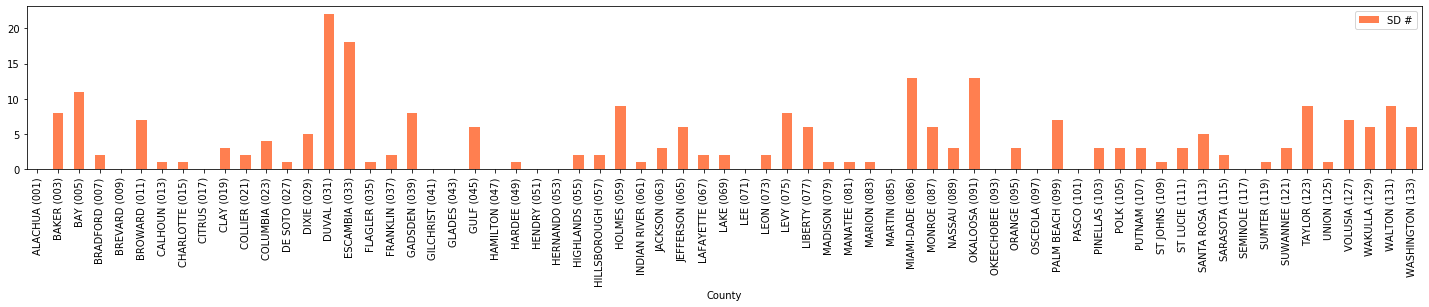

In [9]:
bridge_count.plot( x = 'County', y = 'SD #', kind = 'bar', figsize = (25,3), color = 'coral');

We have created a frequency plot, but it can be sorted according to frequencies of structurally deficient bridges in each county. For question 1, we want to find the tallest bar. So, we sort the bars in descending order using the following command. 

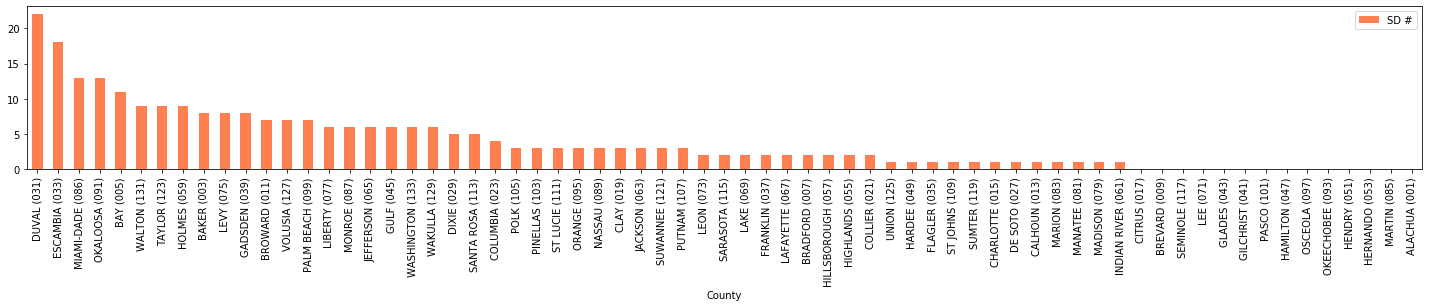

In [10]:
bridge_count.sort_values(by = 'SD #', ascending = False).plot( x = 'County', y = 'SD #', kind = 'bar', figsize = (25,3), color = 'coral');

From the frequency plot that we have just created, we can see that Duval County 
has the highest number of structurally deficient bridges. We can also check 
the answer numerically: ``

In [11]:
bridge_count[bridge_count['SD #'] == bridge_count['SD #'].max()]['County'].values[0]

'DUVAL (031)'

_____

For Question 2, we need to calculate the percentage of bridges that are in good condition. We will also exclude the last row indicating the total of all numeric columns. 

In [12]:
bridge_percentage = bridge[:-1]

In [13]:
bridge_percentage['Good %'] = bridge_percentage['Good #'] * 100 / bridge_percentage['Total #']

Then, we create a bar chart with ascending order of `Good %` values to get our answer to the second question. We will see from the bar plot that Franklin County has the lowest percentage of bridges that are reported to be in good condition. 

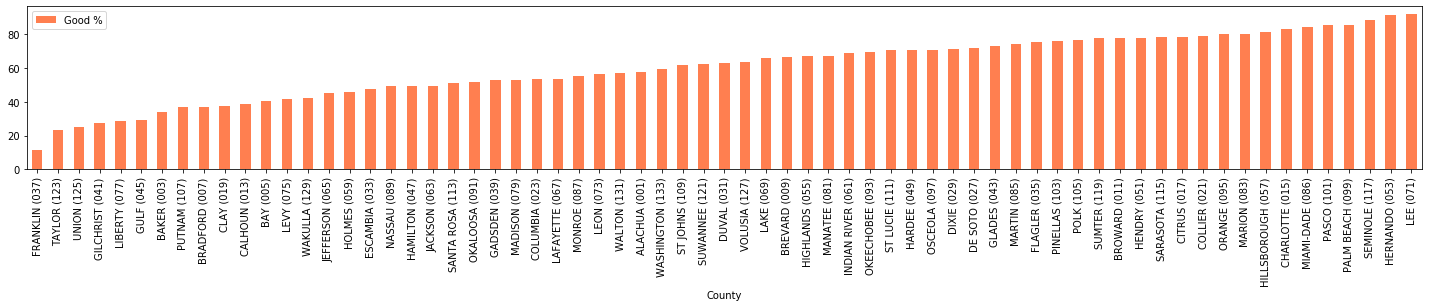

In [14]:
bridge_percentage.sort_values(by = 'Good %', ascending = True).plot(x = 'County', y = 'Good %', kind = 'bar', figsize = (25,3), color = 'coral');

If we want to check your answer numerically, we will simply run the following command:

In [15]:
bridge_percentage[bridge_percentage['Good %'] == bridge_percentage['Good %'].min()]['County'].values[0]

'FRANKLIN (037)'